In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
# read in the raw data from the github url

df = pd.read_csv("https://raw.githubusercontent.com/suneel0101/lesson-plan/master/crunchbase_monthly_export.csv")

In [70]:
df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,"750,000",NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaN,NaN,NaN,NaN,1/1/10,1/1/10,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,"1,750,000",acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012.0,6/30/12,6/30/12,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"4,000,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,6/4/10,9/23/10,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012.0,8/9/12,8/9/12,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,"1,500,000",operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011.0,4/1/11,4/1/11,NaN
5,/organization/n-plusn,#NAME?,http://plusn.com,|Software|,Software,"600,000",operating,USA,NY,New York City,New York,1,1/1/12,2012-01,2012-Q1,2012.0,8/29/12,8/29/12,NaN
6,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"7,000,000",NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,10/10/11,2011-10,2011-Q4,2011.0,5/31/13,5/31/13,NaN
7,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"4,912,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,NaN,NaN,NaN,1/16/07,1/16/07,NaN
8,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"2,000,000",operating,NaN,NaN,NaN,NaN,1,1/1/07,2007-01,2007-Q1,2007.0,3/19/08,3/19/08,NaN
9,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,1/1/10,2010-01,2010-Q1,2010.0,7/24/14,7/24/14,NaN


#### 1. Clean the data. Use .apply and lambda functions where you can

In [50]:
# rename the columns to remove spaces and extra characters
column_name = df.columns
column_name

Index([u'permalink', u'name', u'homepage_url', u'category_list', u' market ',
       u' funding_total_usd ', u'status', u'country_code', u'state_code',
       u'region', u'city', u'funding_rounds', u'founded_at', u'founded_month',
       u'founded_quarter', u'founded_year', u'first_funding_at',
       u'last_funding_at', u'Unnamed: 18'],
      dtype='object')

In [243]:
df.columns = df.columns.map(lambda x:x.strip())


In [63]:
df.columns

Index([u'permalink', u'name', u'homepage_url', u'category_list', u'market',
       u'funding_total_usd', u'status', u'country_code', u'state_code',
       u'region', u'city', u'funding_rounds', u'founded_at', u'founded_month',
       u'founded_quarter', u'founded_year', u'first_funding_at',
       u'last_funding_at', u'Unnamed: 18'],
      dtype='object')

In [100]:
df.loc[:,['funding_total_usd', 'founded_year', 'funding_rounds']].dtypes

funding_total_usd    float64
founded_year         float64
funding_rounds         int64
dtype: object

In [244]:
import numpy as np

def convert_num(x):
    y = x.strip()
    if y == '-':
        y = y.replace('-','')
    elif "," in y:
        y = y.replace(',','')
    
    try:
        return int(y)
    except:
        return 0
    

In [245]:
df['funding_total_usd'] = df['funding_total_usd'].apply(convert_num)

In [216]:
def inte(x):
    try:
        return int(x)
    except:
        return x

In [246]:
# convert the funding, year founded, and funding_rounds columns to integers
df['founded_year'] = df['founded_year'].fillna(0)

df['founded_year'] = df['founded_year'].apply(inte)

In [177]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaN,NaN,NaN,0,1/1/10,1/1/10,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012,6/30/12,6/30/12,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,0,6/4/10,9/23/10,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012,8/9/12,8/9/12,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011,4/1/11,4/1/11,NaN


In [218]:
def clean_cat(x):
    try:
        x = x.strip()
        x = x.strip('|')
        return x.split('|')
    except:
        return x

In [219]:
# convert category_list so that each cell is a list of categories
df['category_list'] = df['category_list'].apply(clean_cat)
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,"[Credit, Technology, Services, Finance]",Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaN,NaN,NaN,0,1/1/10,1/1/10,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,"[Entertainment, Politics, Social Media, News]",Entertainment,1750000,acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012,6/30/12,6/30/12,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,[Games],Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,0,6/4/10,9/23/10,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,"[Publishing, Education]",Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012,8/9/12,8/9/12,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,"[Electronics, Guides, Coffee, Restaurants, Mus...",Apps,1500000,operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011,4/1/11,4/1/11,NaN


In [132]:
# use value_counts on market, status, and country_code to check for any repeats or misnamed entries
df['market'].value_counts()

 Biotechnology                   3868
 Software                        3710
 Curated Web                     2147
 E-Commerce                      2082
 Advertising                     1925
 Mobile                          1628
 Enterprise Software             1324
 Clean Technology                1247
 Games                           1175
 Analytics                       1149
 Hardware + Software             1085
 Health Care                      908
 Education                        903
 Finance                          889
 Health and Wellness              858
 Manufacturing                    662
 None                             609
 Consulting                       512
 Semiconductors                   482
 Social Media                     473
 Hospitality                      463
 Apps                             458
 Security                         436
 Cloud Computing                  410
 Android                          395
 Web Hosting                      380
 Fashion    

In [133]:
df['status'].value_counts()

operating    36135
acquired      3194
closed        2879
Name: status, dtype: int64

In [137]:
df['country_code'].value_counts().to_frame().sort_index()

,country_code
ALB,1
ANT,9
ARE,49
ARG,137
ARM,2
AUS,301
AUT,102
AZE,3
BEL,147
BGD,5


In [ ]:
# BONUS: convert the date columns to appropriate datetime objects

In [247]:
import time

time.strptime("1/1/10", "%m/%d/%y")


time.struct_time(tm_year=2010, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=1, tm_isdst=-1)

In [248]:
def change_date(x):
    
    try:
        return pd.to_datetime(x, format='%m/%d/%y')
    except:
        return np.nan

In [249]:
df['first_funding_at'] = df['first_funding_at'].apply(change_date)
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaN,NaN,NaN,0,2010-01-01,1/1/10,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012,2012-06-30,6/30/12,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,0,2010-06-04,9/23/10,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012,2012-08-09,8/9/12,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011,2011-04-01,4/1/11,NaN


In [250]:
df['last_funding_at'] = df['last_funding_at'].apply(change_date)
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaN,NaN,NaN,0,2010-01-01,2010-01-01,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012,2012-06-30,2012-06-30,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,0,2010-06-04,2010-09-23,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012,2012-08-09,2012-08-09,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011,2011-04-01,2011-04-01,NaN


In [251]:
df['founded_at'] = df['founded_at'].apply(change_date)
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaT,NaN,NaN,0,2010-01-01,2010-01-01,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012,2012-06-30,2012-06-30,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaN,NaN,0,2010-06-04,2010-09-23,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012,2012-08-09,2012-08-09,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04,2011-Q2,2011,2011-04-01,2011-04-01,NaN


In [252]:
df.founded_month = df.founded_month.apply(lambda x: pd.Period(x, freq= "M"))

In [253]:
df.founded_quarter = df.founded_quarter.apply(lambda x: pd.Period(x, freq= "Q"))
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaT,NaT,NaT,0,2010-01-01,2010-01-01,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012Q2,2012,2012-06-30,2012-06-30,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaT,0,2010-06-04,2010-09-23,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10,2012Q4,2012,2012-08-09,2012-08-09,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04,2011Q2,2011,2011-04-01,2011-04-01,NaN


#### 2. Using isnull(), take a subset of the dataframe that has no founded at date

In [254]:
no_found = df[df['founded_at'].isnull()]
no_found.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaT,NaT,NaT,0,2010-01-01,2010-01-01,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaT,0,2010-06-04,2010-09-23,NaN
7,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,4912393,closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaT,NaT,NaT,0,2007-01-16,2007-01-16,NaN
12,/organization/1-4-all,1-4 All,NaN,|Entertainment|Games|Software|,Entertainment,0,operating,USA,NC,North Carolina,Connellys Springs,1,NaT,NaT,NaT,0,2013-04-21,2013-04-21,NaN
19,/organization/1000jobboersen-de,1000jobboersen.de,http://www.1000jobboersen.de,|Curated Web|,Curated Web,0,operating,DEU,NaN,Berlin,Berlin,1,NaT,NaT,NaT,0,2011-09-16,2011-09-16,NaN


#### 3. Create a new column, founded_year_x, that's a copy of founded_year. Then, replace all the missing values with either the mean , mode, or median of that column. 
Add a note explaining which statistic you picked and why:

In [255]:
df['founded_year_x'] = df['founded_year']

#fy_mean = df['found_year_x'].apply(np.mean)
#fy_mean
#df['founded_year_x'].replace(np.nan, )

In [256]:
df['founded_year_x'] = df['founded_year_x'].fillna(np.median)

#### 4. Take a subset of US-based companies using boolean selection

In [257]:
us_df = df[df['country_code'] == 'USA']
us_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18,founded_year_x
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012Q2,2012,2012-06-30,2012-06-30,NaN,2012
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaT,0,2010-06-04,2010-09-23,NaN,0
5,/organization/n-plusn,#NAME?,http://plusn.com,|Software|,Software,600000,operating,USA,NY,New York City,New York,1,2012-01-01,2012-01,2012Q1,2012,2012-08-29,2012-08-29,NaN,2012
6,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011Q4,2011,2013-05-31,2013-05-31,NaN,2011
9,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01,2010Q1,2010,2014-07-24,2014-07-24,NaN,2010


#### 5. Create a pivot table showing total, mean, and median funding amount by year

In [258]:
pd.pivot_table(us_df,index = ['founded_year'], values = ['funding_total_usd'], aggfunc = [sum, np.mean, np.median])

,sum,mean,median
,funding_total_usd,funding_total_usd,funding_total_usd
founded_year,,,
0,136100068382,29112314,1850000
1902,3100000,3100000,3100000
1906,1137800000,227560000,10000000
1910,100000,100000,100000
1911,2400000,2400000,2400000
1912,9700000,4850000,4850000
1913,101150779,50575389,50575389
1914,33300000,16650000,16650000


#### 6. Create a pivot table showing total, mean and median funding amount by market

In [259]:
pd.pivot_table(us_df,index = ['market'], values = ['funding_total_usd'], aggfunc = [sum, np.mean, np.median])

,sum,mean,median
,funding_total_usd,funding_total_usd,funding_total_usd
market,,,
3D,378300997,18014333,1800000
3D Printing,7395000,3697500,3697500
Accounting,583941956,15782215,1835000
Active Lifestyle,21700000,10850000,10850000
Ad Targeting,1149258201,31923838,10033193
Advanced Materials,55500000,27750000,27750000
Adventure Travel,1070000,118888,100000
Advertising,15973454927,14351711,2500000


#### 7. CHALLENGE: Using matplotlib, create a scatter plot showing funding amount on the y-axis, and first_funding_date on the x-axis
(first_funding_date will need to be a timestamp)

In [265]:
type(df['first_funding_at'][1])

pandas.tslib.Timestamp

In [285]:
plot_df = df.dropna(subset=['first_funding_at'], how='all')

In [286]:
plot_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18,founded_year_x
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaT,NaT,NaT,0,2010-01-01,2010-01-01,NaN,0
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012Q2,2012,2012-06-30,2012-06-30,NaN,2012
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaT,0,2010-06-04,2010-09-23,NaN,0
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10,2012Q4,2012,2012-08-09,2012-08-09,NaN,2012
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04,2011Q2,2011,2011-04-01,2011-04-01,NaN,2011


In [287]:
plot_df['datenum'] = plot_df['first_funding_at'].apply(matplotlib.dates.date2num)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [288]:
plot_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18,founded_year_x,datenum
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,750000,NaN,BRA,NaN,Rio de Janeiro,...,1,NaT,NaT,NaT,0,2010-01-01,2010-01-01,NaN,0,733773.0
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,1750000,acquired,USA,NY,New York City,...,1,2012-06-01,2012-06,2012Q2,2012,2012-06-30,2012-06-30,NaN,2012,734684.0
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,...,2,NaT,NaT,NaT,0,2010-06-04,2010-09-23,NaN,0,733927.0
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,40000,operating,EST,NaN,Tallinn,...,1,2012-10-26,2012-10,2012Q4,2012,2012-08-09,2012-08-09,NaN,2012,734724.0
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,1500000,operating,GBR,NaN,London,...,1,2011-04-01,2011-04,2011Q2,2011,2011-04-01,2011-04-01,NaN,2011,734228.0


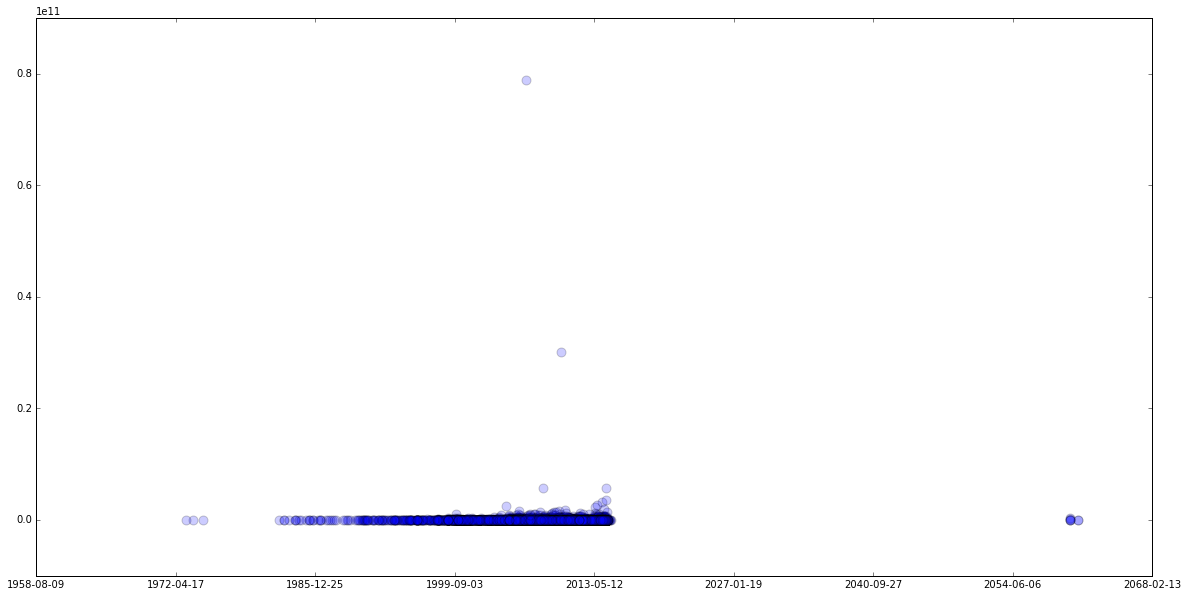

In [307]:
%matplotlib inline
import matplotlib.pyplot
import pylab

x = plot_df['datenum']
y = plot_df['funding_total_usd']

plt.figure(figsize=(20,10))

ax=plt.gca()
xfmt = matplotlib.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)


matplotlib.pyplot.scatter(x,y, s = 80, alpha = 0.2)

plt.show()

#### 8. Here's the fun part. Create a hypothesis based on your data that you can reasonably test. 
For example: "Credit companies based in the US that only get 1 round of funding tend to receive more funding than companies based outside the US"



When you have your hypothesis, write it below, and Slack it to the instructors so we can check in. 

#### 9. Test your hypothesis. 

You'll need to evaluate your hypothesis using a t-test (see Monday's lecture 1.3), so make sure you have enough data compare samples. If your original hypothesis is too narrow, you may need to broaden the scope.

#### 10. CHALLENGE
- Plot the distribution of both samples
- Explain your results in one short sentence. 
- Explain your result in a slighly longer technical paragraph, touching on the statistics you presented. 
- Subset your findings: if you looked at a certain market in a certain geography, break it down by another variable (e.g number of funding rounds) and compare those samples. 